<a href="https://colab.research.google.com/github/dlckdtn62/BIO-PREDICTION/blob/master/Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/bio'

In [0]:
import pandas as pd
import numpy as np
import math

In [0]:
test = pd.read_csv(path+'/test.csv')
train = pd.read_csv(path+'/train.csv')
submission=pd.read_csv(path + '/sample_submission.csv', index_col='id')

In [0]:
trn_dst_filled = train.filter(regex='dst$').T.interpolate(method='linear')[::-1].interpolate(method='linear')[::-1].T
tst_dst_filled = test.filter(regex='dst$').T.interpolate(method='linear')[::-1].interpolate(method='linear')[::-1].T

train.update(trn_dst_filled)
test.update(tst_dst_filled)

In [13]:
for row in range(len(train)):
  start, finish = 37, len(train.columns)-5
  for column in range(37, len(train.columns)-4):
    if train.iloc[row, column] == 0:
      for j in range(column, 36, -1):
        if train.iloc[row, j] != 0 and not math.isnan(train.iloc[row, j]):
          start = j
          break
      for j in range(column+1, len(train.columns)-4):
        if train.iloc[row, j] != 0 and not math.isnan(train.iloc[row, j]):
          finish = j
          break
      value = (train.iloc[row, start]+train.iloc[row, finish])/(finish-start+1)
      for j in range(1, finish-start):
        if math.isnan(train.iloc[row, start+j]):
          continue
        train.iloc[row, start+j] = value*j+train.iloc[row, start]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [14]:
for row in range(len(test)):
  start, finish = 37, len(test.columns)-1
  for column in range(37, len(test.columns)):
    if test.iloc[row, column] == 0:
      for j in range(column, 36, -1):
        if test.iloc[row, j] != 0 and not math.isnan(test.iloc[row, j]):
          start = j
          break
      for j in range(column+1, len(test.columns)):
        if test.iloc[row, j] != 0 and not math.isnan(test.iloc[row, j]):
          finish = j
          break
      value = (test.iloc[row, start]+test.iloc[row, finish])/(finish-start+1)
      for j in range(1, finish-start):
        if math.isnan(test.iloc[row, start+j]):
          continue
        test.iloc[row, start+j] = value*j+test.iloc[row, start]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [0]:
src_list=['650_src', '660_src', '670_src', '680_src', '690_src', '700_src', '710_src', '720_src', '730_src', 
          '740_src', '750_src', '760_src', '770_src', '780_src', '790_src', '800_src', '810_src', '820_src', 
          '830_src', '840_src', '850_src', '860_src', '870_src', '880_src', '890_src', '900_src', '910_src', 
          '920_src', '930_src', '940_src', '950_src', '960_src', '970_src', '980_src', '990_src']

dst_list=['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst', '710_dst', '720_dst', '730_dst', 
          '740_dst', '750_dst', '760_dst', '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst', 
          '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst', '890_dst', '900_dst', '910_dst', 
          '920_dst', '930_dst', '940_dst', '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']

In [0]:
feature_names=list(test)
target_names=list(submission)

Xtrain = train[feature_names]
Xtest = test[feature_names]

Ytrain=train[target_names]

In [0]:
import tqdm

In [21]:
alpha_real=Xtrain[dst_list]
alpha_imag=Xtrain[dst_list]

beta_real=Xtest[dst_list]
beta_imag=Xtest[dst_list]

for i in (alpha_real.index):
    alpha_real.loc[i]=alpha_real.loc[i] - alpha_real.loc[i].mean()
    alpha_imag.loc[i]=alpha_imag.loc[i] - alpha_real.loc[i].mean()
    
    alpha_real.loc[i] = np.fft.fft(alpha_real.loc[i], norm='ortho').real
    alpha_imag.loc[i] = np.fft.fft(alpha_imag.loc[i], norm='ortho').imag

    
for i in (beta_real.index):
    beta_real.loc[i]=beta_real.loc[i] - beta_real.loc[i].mean()
    beta_imag.loc[i]=beta_imag.loc[i] - beta_imag.loc[i].mean()
    
    beta_real.loc[i] = np.fft.fft(beta_real.loc[i], norm='ortho').real
    beta_imag.loc[i] = np.fft.fft(beta_imag.loc[i], norm='ortho').imag
    
real_part=[]
imag_part=[]

for col in dst_list:
    real_part.append(col + '_fft_real')
    imag_part.append(col + '_fft_imag')
    
alpha_real.columns=real_part
alpha_imag.columns=imag_part
alpha = pd.concat((alpha_real, alpha_imag), axis=1)

beta_real.columns=real_part
beta_imag.columns=imag_part
beta=pd.concat((beta_real, beta_imag), axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-pack

In [29]:
alpha

,650_dst_fft_real,660_dst_fft_real,670_dst_fft_real,680_dst_fft_real,690_dst_fft_real,700_dst_fft_real,710_dst_fft_real,720_dst_fft_real,730_dst_fft_real,740_dst_fft_real,750_dst_fft_real,760_dst_fft_real,770_dst_fft_real,780_dst_fft_real,790_dst_fft_real,800_dst_fft_real,810_dst_fft_real,820_dst_fft_real,830_dst_fft_real,840_dst_fft_real,850_dst_fft_real,860_dst_fft_real,870_dst_fft_real,880_dst_fft_real,890_dst_fft_real,900_dst_fft_real,910_dst_fft_real,920_dst_fft_real,930_dst_fft_real,940_dst_fft_real,950_dst_fft_real,960_dst_fft_real,970_dst_fft_real,980_dst_fft_real,990_dst_fft_real,650_dst_fft_imag,660_dst_fft_imag,670_dst_fft_imag,680_dst_fft_imag,690_dst_fft_imag,700_dst_fft_imag,710_dst_fft_imag,720_dst_fft_imag,730_dst_fft_imag,740_dst_fft_imag,750_dst_fft_imag,760_dst_fft_imag,770_dst_fft_imag,780_dst_fft_imag,790_dst_fft_imag,800_dst_fft_imag,810_dst_fft_imag,820_dst_fft_imag,830_dst_fft_imag,840_dst_fft_imag,850_dst_fft_imag,860_dst_fft_imag,870_dst_fft_imag,880_dst_fft_imag,890_dst_fft_imag,900_dst_fft_imag,910_dst_fft_imag,920_dst_fft_imag,930_dst_fft_imag,940_dst_fft_imag,950_dst_fft_imag,960_dst_fft_imag,970_dst_fft_imag,980_dst_fft_imag,990_dst_fft_imag
0,3.437719e-32,-5.992388e-17,5.585858e-17,-1.731717e-17,1.083532e-17,7.780239e-18,-1.024213e-17,1.057451e-17,-4.069669e-18,2.368409e-18,-1.573659e-18,-3.804986e-18,-2.416418e-18,-9.379916e-18,-2.346482e-18,-9.141150e-18,-3.641383e-18,-5.679007e-18,-5.679007e-18,-3.641383e-18,-9.141150e-18,-2.346482e-18,-9.379916e-18,-2.416418e-18,-3.804986e-18,-1.573659e-18,2.368409e-18,-4.069669e-18,1.057451e-17,-1.024213e-17,7.780239e-18,1.083532e-17,-1.731717e-17,5.585858e-17,-5.992388e-17,0.0,-1.551008e-17,2.559590e-17,-2.908543e-17,3.394529e-17,-1.791928e-17,2.220499e-17,4.557715e-18,7.454173e-18,1.021115e-17,5.154114e-18,4.780817e-18,3.144994e-18,7.092783e-18,1.606691e-18,3.322277e-18,7.013757e-18,-6.397836e-18,6.397836e-18,-7.013757e-18,-3.322277e-18,-1.606691e-18,-7.092783e-18,-3.144994e-18,-4.780817e-18,-5.154114e-18,-1.021115e-17,-7.454173e-18,-4.557715e-18,-2.220499e-17,1.791928e-17,-3.394529e-17,2.908543e-17,-2.559590e-17,1.551008e-17
1,-1.398190e-24,5.827236e-09,-1.981319e-09,-2.321332e-09,5.147994e-10,2.810093e-09,1.200740e-09,-1.894935e-09,-3.147271e-09,-2.677777e-09,-8.969810e-10,2.799632e-10,-5.071037e-10,-1.069022e-09,-8.411567e-10,-6.185082e-10,-5.218269e-10,-1.019863e-09,-1.019863e-09,-5.218269e-10,-6.185082e-10,-8.411567e-10,-1.069022e-09,-5.071037e-10,2.799632e-10,-8.969810e-10,-2.677777e-09,-3.147271e-09,-1.894935e-09,1.200740e-09,2.810093e-09,5.147994e-10,-2.321332e-09,-1.981319e-09,5.827236e-09,0.0,8.492523e-09,6.707295e-09,6.225232e-10,-3.970758e-10,1.342062e-09,4.199394e-09,4.091404e-09,1.731847e-09,-1.541167e-10,-1.123124e-09,3.595184e-11,1.068912e-09,3.074217e-10,-4.234470e-11,1.203018e-10,2.153961e-10,2.099953e-10,-2.099953e-10,-2.153961e-10,-1.203018e-10,4.234470e-11,-3.074217e-10,-1.068912e-09,-3.595184e-11,1.123124e-09,1.541167e-10,-1.731847e-09,-4.091404e-09,-4.199394e-09,-1.342062e-09,3.970758e-10,-6.225232e-10,-6.707295e-09,-8.492523e-09
2,-1.041733e-33,-4.669640e-18,3.866492e-18,-6.175324e-18,2.028071e-18,-4.067773e-18,1.567005e-18,-5.291547e-19,-2.455387e-19,6.205302e-19,4.257863e-19,8.378976e-19,-4.450605e-19,6.070741e-19,4.489152e-19,-1.039696e-18,-5.207718e-19,-2.627114e-19,-2.627114e-19,-5.207718e-19,-1.039696e-18,4.489152e-19,6.070741e-19,-4.450605e-19,8.378976e-19,4.257863e-19,6.205302e-19,-2.455387e-19,-5.291547e-19,1.567005e-18,-4.067773e-18,2.028071e-18,-6.175324e-18,3.866492e-18,-4.669640e-18,0.0,4.134351e-18,4.387226e-18,-7.585964e-19,2.307834e-18,-1.134384e-18,-7.720739e-19,-5.590281e-19,4.405187e-19,-1.984931e-18,7.405530e-19,4.260295e-19,2.249799e-19,2.646374e-19,4.764819e-19,6.927909e-19,3.423708e-19,-1.980030e-19,1.980030e-19,-3.423708e-19,-6.927909e-19,-4.764819e-19,-2.646374e-19,-2.249799e-19,-4.260295e-19,-7.405530e-19,1.984931e-18,-4.405187e-19,5.590281e-19,7.720739e-19,1.134384e-18,-2.307834e-18,7.585964e-19,-4.387226

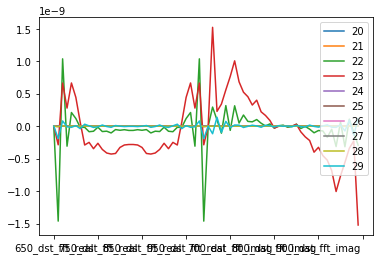

In [45]:
import matplotlib.pyplot as plt

alpha.T.iloc[:, 20:30].plot()

In [0]:
x = train[dst_list]
x1 = test[dst_list]

In [0]:
x = np.fft.fft(x)

In [0]:
combined = pd.DataFrame(pd.concat((pd.DataFrame(x.real), pd.DataFrame(x.imag)), axis = 1))
combined.columns = alpha.columns

<Figure size 1440x1440 with 0 Axes>

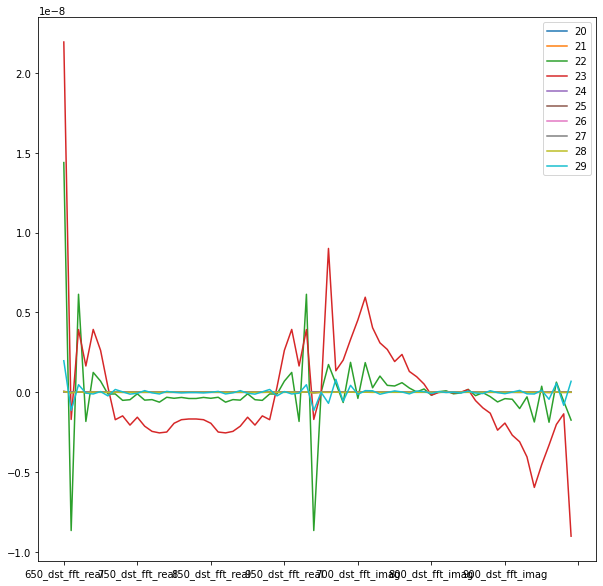

In [67]:
fig = plt.figure(figsize = (20, 20))
combined.T.iloc[:, 20:30].plot(figsize = (10, 10))
plt.show()

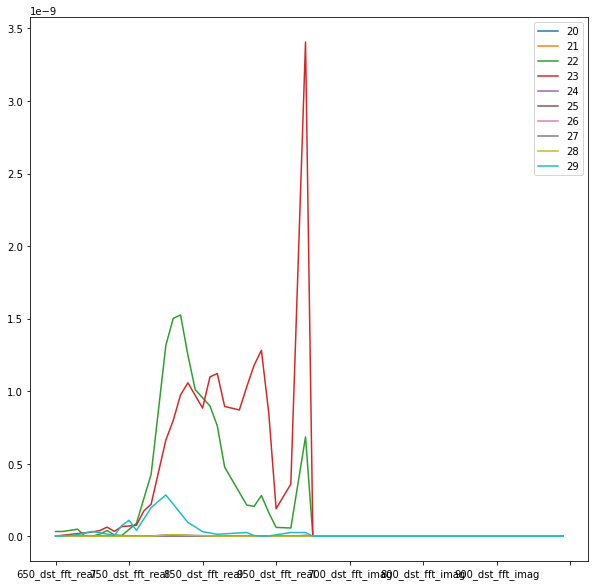

In [68]:
temp = np.copy(x)
temp[-3:3] = 0
x = np.fft.ifft(temp)
ifft_combined = pd.DataFrame(pd.concat((pd.DataFrame(x.real), pd.DataFrame(x.imag)), axis = 1))
ifft_combined.columns = alpha.columns
ifft_combined.T.iloc[:, 20:30].plot(figsize = (10, 10))
plt.show()